In [1]:
from PIL import Image
import io
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import ast 
import base64
import numpy as np
import os
%matplotlib inline

In [5]:
df = pd.read_csv("/content/drive/My Drive/Algorithms and Digital Marketing/Assignment3/Project_Demo/finalData.csv")
df = df.drop("Unnamed: 0", axis=1)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
categories = df["0"].unique()

In [ ]:
categories[200:250]

array(['1000002181_4864.jpg', '1000002194_1390.jpg',
       '1000002194_6382.jpg', '1000002200_7515.jpg',
       '1000002215_5208.jpg', '1000002219_6933.jpg',
       '1000002239_7992.jpg', '1000002258_9088.jpg',
       '1000002271_9310.jpg', '1000002275_9258.jpg',
       '1000002293_9853.jpg', '1000002308_7483.jpg',
       '1000002324_6202.jpg', '1000002326_3884.jpg',
       '1000002326_5131.jpg', '1000002328_1279.jpg',
       '1000002328_1296.jpg', '1000002328_1541.jpg',
       '1000002328_1807.jpg', '1000002328_250.jpg', '1000002328_2889.jpg',
       '1000002328_2902.jpg', '1000002328_3010.jpg',
       '1000002328_3173.jpg', '1000002328_3197.jpg', '1000002328_504.jpg',
       '1000002328_5218.jpg', '1000002328_5533.jpg', '1000002328_588.jpg',
       '1000002328_616.jpg', '1000002328_7426.jpg', '1000002328_7453.jpg',
       '1000002328_7512.jpg', '1000002328_7683.jpg',
       '1000002328_7897.jpg', '1000002328_8031.jpg',
       '1000002328_8142.jpg', '1000002328_8295.jpg',
       '100

In [26]:
df.head(20)

,0,1,2
0,1000000237_9026.jpg,"[0.23940581, 2.0513442, 0.0, 0.0, 0.0, 0.59306...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,1000000285_5699.jpg,"[0.2106179, 1.8105485, 0.0, 0.06682516, 0.0, 0...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,1000000364_4915.jpg,"[0.023738034, 1.2948775, 0.0, 0.0, 0.0, 0.0, 0...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,1000000383_7050.jpg,"[0.03416881, 0.64189017, 0.0, 0.16002204, 0.0,...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,1000000389_9891.jpg,"[0.049605418, 0.10058902, 0.0, 0.0, 0.0, 0.0, ...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
5,1000000416_9094.jpg,"[0.26432753, 0.19600514, 0.33446375, 0.0, 0.0,...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
6,1000000422_6096.jpg,"[0.23538855, 2.0387917, 0.0, 0.0332729, 0.0, 0...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
7,1000000428_2199.jpg,"[0.0, 0.8772191, 0.0, 0.0, 0.0, 0.09347155, 0....",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
8,1000000428_355.jpg,"[0.06434821, 0.5424289, 0.0, 0.0, 0.0, 0.34357...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
9,1000000428_6076.jpg,"[0.041577533, 0.54684126, 0.0, 0.0, 0.0, 0.454...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


#### User Input

In [27]:
IMAGE_NAME  =  "1000000485_4358.jpg"
a1_file  = IMAGE_NAME.split("_")[1].split(".jpg")[0]
a1_vector = df.iloc[int(a1_file)][1]
a1_image  =  df.iloc[int(a1_file)][2]
IMAGE_VECTOR = ast.literal_eval(a1_vector)

#### The function 'stringToRGB' - It takes base64 image into an array of vectors

In [28]:
# Take in base64 string and return a numpy image array
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return np.array(image)

In [ ]:
# Display what the user selected an image

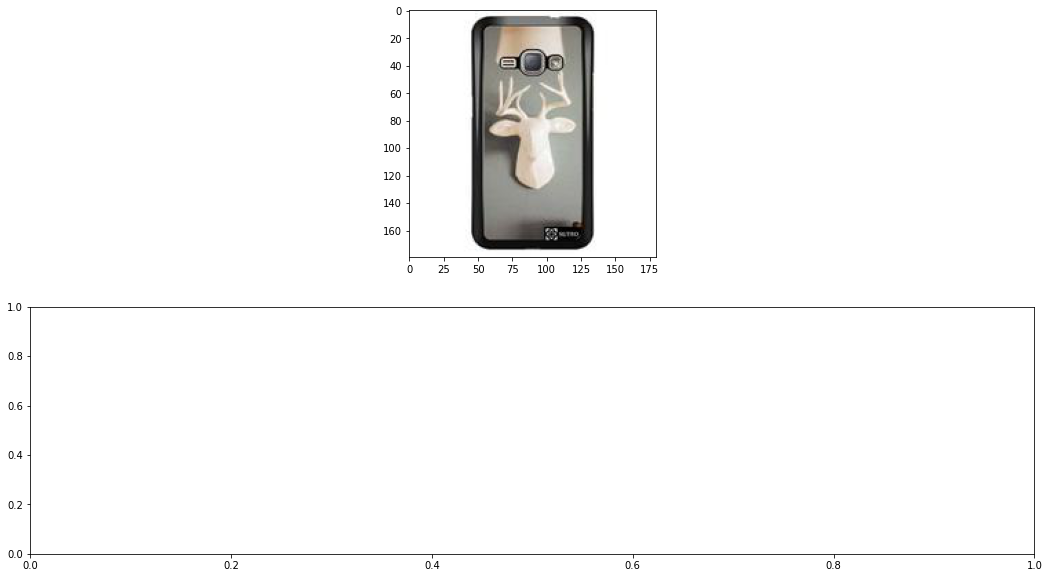

In [29]:
fig, ax = plt.subplots(2, figsize=(18,10))
ax[0].imshow(stringToRGB(a1_image))

### Finding Similar Images
* Algorithm 
* We take the input image and convert it into vector i.e array of numbers (Computers understands numbers and not images or characters)
* Once we compute the array , then we iterate over all the images.. For each single image..we compute the array and then we apply Cosine Similarity algorithm on both the vectors. It gives a number ranging from 0 to 1... 
* The number 0 being most dissimlar image and 1 being most similar image
* We have set the threshhold value to be 70% 
* So we grab the 10 similar images whose similarity is greater than 70% and we display it to the user
* Please note : We can speed up this process by using Elastic Search 
* The worst case complexity of this algorithm is O(N).

In [30]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [33]:
counter = 0
IMG   = []
FILE  = []
VEC   = []

#Iterate over all the images 

for vector in df.iterrows():
    FileName =  vector[1][0] # Grabs the Filename of the image
    Vector_ = vector[1][1] # Grabs the vector of the image
    Vector_ = ast.literal_eval(Vector_) # Converting a String into list
    Image = vector[1][2] # Image is basically a Base data of that image
    
    sim = cosineSim(Vector_,IMAGE_VECTOR) # For each Image..we are computing Cosine Similarity
  
    if (float(sim) > 0.72):
        counter = counter + 1 # to track..the count of images
        IMG.append(Image)
        VEC.append(Vector_)
        FILE.append(FileName)
    if counter ==10: #displaying 10 images
        break

##### After iterating we got the first 10 images whose similarity is greater than 72%.. And we will display 10 similar images

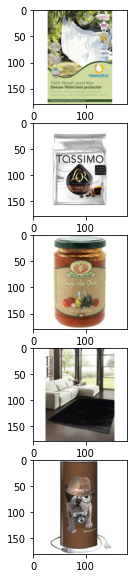

In [34]:
from PIL import Image
import io
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import ast 

fig, ax = plt.subplots(5, figsize=(18,10))

# Take in base64 string and return a numpy image array
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(imgdata))
    return np.array(image)

for i in range(0,5):
    ax[i].imshow(stringToRGB(IMG[i]))